In [2]:
# OpenSoundscape imports
from opensoundscape import Audio, Spectrogram
from opensoundscape.annotations import BoxedAnnotations

# General-purpose packages
import numpy as np
import pandas as pd
from glob import glob
from pathlib import Path


from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for big visuals
%config InlineBackend.figure_format = 'retina'


c:\Users\jonat\anaconda3\envs\bird\lib\site-packages\opensoundscape\ml\cnn.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Loading Raven Files

In [3]:
from glob import glob
import os
import re

# Assuming your current working directory is the base path
base_path = os.getcwd()

# Folder name
folder_name = "ravenSelectionTables"

# Construct the relative path
relative_folder_path = os.path.join(base_path, folder_name)

# Use glob to find all .txt files directly in the folder
selections = glob(os.path.join(relative_folder_path, "*.txt"))
# Regular expression pattern to extract the date and time part
pattern = r"(\d{8}_\d{6})" #NOTE THIS MAY NOT WORK FOR ALL RECORDINGS IN OTHER FILES

# Iterate through files and rename to include only the date and time part
for old_file_path in selections:
    old_file_name = os.path.basename(old_file_path)
    
    # Use regex to find the date and time part
    match = re.search(pattern, old_file_name)
    
    if match:
        new_file_name = match.group(1)
        
        # Construct the new file path
        new_file_path = os.path.join(relative_folder_path, new_file_name + ".txt")
        
        # Rename the file
        os.rename(old_file_path, new_file_path)
        print(f"Renamed: {old_file_path} to {new_file_path}")
    else:
        print(f"No match found in filename: {old_file_name}")

# Optional: Print the updated list of files in ravenSelectionTables
updated_selections = glob(os.path.join(relative_folder_path, "*.txt"))
print(updated_selections)




Renamed: c:\Users\jonat\Documents\bobwhite\ravenSelectionTables\20221022_060000.txt to c:\Users\jonat\Documents\bobwhite\ravenSelectionTables\20221022_060000.txt
Renamed: c:\Users\jonat\Documents\bobwhite\ravenSelectionTables\20221024_060000.txt to c:\Users\jonat\Documents\bobwhite\ravenSelectionTables\20221024_060000.txt
Renamed: c:\Users\jonat\Documents\bobwhite\ravenSelectionTables\20221025_060000.txt to c:\Users\jonat\Documents\bobwhite\ravenSelectionTables\20221025_060000.txt
Renamed: c:\Users\jonat\Documents\bobwhite\ravenSelectionTables\20221027_060000.txt to c:\Users\jonat\Documents\bobwhite\ravenSelectionTables\20221027_060000.txt
Renamed: c:\Users\jonat\Documents\bobwhite\ravenSelectionTables\20221029_060000.txt to c:\Users\jonat\Documents\bobwhite\ravenSelectionTables\20221029_060000.txt
Renamed: c:\Users\jonat\Documents\bobwhite\ravenSelectionTables\20221030_060000.txt to c:\Users\jonat\Documents\bobwhite\ravenSelectionTables\20221030_060000.txt
Renamed: c:\Users\jonat\Docu

Rename audio files to match raven txt selection file names

In [4]:
# create a list of audio files, one corresponding to each Raven file
'''so this is going through the ravenSelectionTables folder and finidng the audio files. 
For now, we manually make sure the audio name is EXACT SAME as the txt file name.'''
audio_files = glob(os.path.join(relative_folder_path, "*.wav"))

# Regular expression pattern to extract the date and time part
pattern = r"(\d{8}_\d{6})" #NOTE THIS MAY NOT WORK FOR ALL RECORDINGS IN OTHER FILES

# Iterate through files and rename to include only the date and time part
for old_file_path in audio_files:
    old_file_name = os.path.basename(old_file_path)
    
    # Use regex to find the date and time part
    match = re.search(pattern, old_file_name)
    
    if match:
        new_file_name = match.group(1)
        
        # Construct the new file path
        new_file_path = os.path.join(relative_folder_path, new_file_name + ".wav")
        
        # Rename the file
        os.rename(old_file_path, new_file_path)
        print(f"Renamed: {old_file_path} to {new_file_path}")
    else:
        print(f"No match found in filename: {old_file_name}")

# Optional: Print the updated list of files in ravenSelectionTables
updated_audio_files = glob(os.path.join(relative_folder_path, "*.wav"))
print(updated_audio_files)


Renamed: c:\Users\jonat\Documents\bobwhite\ravenSelectionTables\20221022_060000.wav to c:\Users\jonat\Documents\bobwhite\ravenSelectionTables\20221022_060000.wav
Renamed: c:\Users\jonat\Documents\bobwhite\ravenSelectionTables\20221024_060000.wav to c:\Users\jonat\Documents\bobwhite\ravenSelectionTables\20221024_060000.wav
Renamed: c:\Users\jonat\Documents\bobwhite\ravenSelectionTables\20221025_060000.wav to c:\Users\jonat\Documents\bobwhite\ravenSelectionTables\20221025_060000.wav
Renamed: c:\Users\jonat\Documents\bobwhite\ravenSelectionTables\20221027_060000.wav to c:\Users\jonat\Documents\bobwhite\ravenSelectionTables\20221027_060000.wav
Renamed: c:\Users\jonat\Documents\bobwhite\ravenSelectionTables\20221029_060000.wav to c:\Users\jonat\Documents\bobwhite\ravenSelectionTables\20221029_060000.wav
Renamed: c:\Users\jonat\Documents\bobwhite\ravenSelectionTables\20221030_060000.wav to c:\Users\jonat\Documents\bobwhite\ravenSelectionTables\20221030_060000.wav
Renamed: c:\Users\jonat\Docu

In [5]:
import os

def find_matching_pairs(folder_path):
    matching_pairs = []
    missing_pairs = []
    duplicate_files = []

    all_files = [file for file in os.listdir(folder_path) if file.endswith((".wav", ".txt"))]
    wav_files = set(file for file in all_files if file.endswith(".wav"))
    txt_files = set(file for file in all_files if file.endswith(".txt"))

    # Check for matching pairs
    for wav_file in wav_files:
        txt_file = wav_file.replace(".wav", ".txt")
        if txt_file in txt_files:
            matching_pairs.append((wav_file, txt_file))
        else:
            missing_pairs.append(wav_file)

    for txt_file in txt_files:
        wav_file = txt_file.replace(".txt", ".wav")
        if wav_file not in wav_files:
            missing_pairs.append(txt_file)

    # Check for duplicates
    file_count = {}
    for file in all_files:
        if file in file_count:
            file_count[file] += 1
        else:
            file_count[file] = 1

    for file, count in file_count.items():
        if count > 1:
            duplicate_files.append(file)

    # Print warnings
    if missing_pairs:
        print("Warning: Some files do not have corresponding pairs:")
        for file in missing_pairs:
            print(file)

    if duplicate_files:
        print("Warning: Some files are duplicated:")
        for file in duplicate_files:
            print(file)

    return matching_pairs

# Replace 'folder_path' with the path to your ravenSelectiontable folder
folder_path = './ravenSelectionTables'
matching_pairs = find_matching_pairs(folder_path)
#for pair in matching_pairs:
    #print(pair)


In [6]:
# Path to the directory containing Raven selection tables
dataset_path = Path("./ravenSelectionTables/")

# Using glob to find all files with a .txt extension in the specified directory
selection_files = glob(f"{dataset_path}/*.txt")

# Counting the number of .txt files found
len(selection_files)

# Creating a list comprehension to generate corresponding audio file names
audio_files = [f.replace('.txt','.wav') for f in selections]

In [7]:
from opensoundscape import BoxedAnnotations

all_annotations = BoxedAnnotations.from_raven_files(
    updated_selections,audio_files)

#RENAME DUPLICATE ANNOTATION TEST
all_annotations.df.rename(columns={'annotation': 'length'}, inplace=True)
all_annotations.df.rename(columns={'Annotation': 'annotation'}, inplace=True)

all_annotations.df.head(10)




c:\Users\jonat\anaconda3\envs\bird\lib\site-packages\opensoundscape\annotations.py:258: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_annotations = pd.concat(all_file_dfs).reset_index(drop=True)


,audio_file,annotation_file,length,start_time,end_time,low_f,high_f,Selection,Delta Freq (Hz),Channel,View,Avg Power Density (dB FS/Hz),annotation
0,c:\Users\jonat\Documents\bobwhite\ravenSelecti...,c:\Users\jonat\Documents\bobwhite\ravenSelecti...,0.4319,3.965968,4.397906,875.324,2379.786,1,1504.462,1,Spectrogram 1,-69.59,NOBO?
1,c:\Users\jonat\Documents\bobwhite\ravenSelecti...,c:\Users\jonat\Documents\bobwhite\ravenSelecti...,0.3829,6.253273,6.636125,711.201,2407.140,2,1695.939,1,Spectrogram 1,-69.65,NOBO?
2,c:\Users\jonat\Documents\bobwhite\ravenSelecti...,c:\Users\jonat\Documents\bobwhite\ravenSelecti...,0.4319,7.794502,8.226439,711.201,2407.140,3,1695.939,1,Spectrogram 1,-71.17,NOBO?
3,c:\Users\jonat\Documents\bobwhite\ravenSelecti...,c:\Users\jonat\Documents\bobwhite\ravenSelecti...,0.4319,9.090314,9.522251,656.493,2434.494,4,1778.001,1,Spectrogram 1,-69.66,NOBO?
4,c:\Users\jonat\Documents\bobwhite\ravenSelecti...,c:\Users\jonat\Documents\bobwhite\ravenSelecti...,0.3534,173.404513,173.757917,1340.340,2434.494,5,1094.154,1,Spectrogram 1,-75.79,NOBO?
5,c:\Users\jonat\Documents\bobwhite\ravenSelecti...,c:\Users\jonat\Documents\bobwhite\ravenSelecti...,0.5497,203.125508,203.675246,1312.986,2325.079,6,1012.093,1,Spectrogram 1,-75.56,NOBO?
6,c:\Users\jonat\Documents\bobwhite\ravenSelecti...,c:\Users\jonat\Documents\bobwhite\ravenSelecti...,0.9762,228.023939,229.000169,1340.340,2543.910,7,1203.570,1,Spectrogram 1,-76.43,NOBO?
7,c:\Users\jonat\Documents\bobwhite\ravenSelecti...,c:\Users\jonat\Documents\bobwhite\ravenSelecti...,1.0652,238.451164,239.516400,957.385,2352.433,8,1395.048,1,Spectrogram 1,-73.78,NOBO?
8,c:\Users\jonat\Documents\bobwhite\ravenSelecti...,c:\Users\jonat\Documents\bobwhite\ravenSelecti...,0.9087,381.698337,382.607028,1121.509,2243.017,9,1121.508,1,Spectrogram 1,-69.67,NOBO?
9,c:\Users\jonat\Documents\bobwhite\ravenSelecti...,c:\Users\jonat\Documents\bobwhite\ravenSelecti...,1.0671,389.420798,390.487866,1340.340,2379.786,10,1039.446,1,Spectrogram 1,-74.70,NOBO?


In [8]:
# Defines parameters for creating one-hot encoded clip labels
clip_duration = 1  # Duration of each clip in seconds
clip_overlap = 0.5  # Overlap between consecutive clips in seconds
min_label_overlap = 0.1  # Minimum overlap required with a label for a clip to be considered positive
class_list = ["NOBO"]  # List of species for which to create one-hot encoded labels

# Creates one-hot encoded clip labels DataFrame using annotations
labels_df = all_annotations.one_hot_clip_labels(
    clip_duration=clip_duration,
    clip_overlap=clip_overlap,
    min_label_overlap=min_label_overlap,
    class_subset=class_list  # Specify the species of interest to include in the labels
)

# Prints the resulting DataFrame containing one-hot encoded clip labels
print(labels_df)


                                                                        NOBO
file                                               start_time end_time      
c:\Users\jonat\Documents\bobwhite\ravenSelectio... 0.0        1.0        0.0
                                                   0.5        1.5        0.0
                                                   1.0        2.0        0.0
                                                   1.5        2.5        0.0
                                                   2.0        3.0        0.0
...                                                                      ...
c:\Users\jonat\Documents\bobwhite\ravenSelectio... 597.0      598.0      0.0
                                                   597.5      598.5      0.0
                                                   598.0      599.0      0.0
                                                   598.5      599.5      0.0
                                                   599.0      600.0      0.0

In [9]:
import random

# Get the list of files in the directory with '.txt' extension
files = os.listdir("./ravenSelectionTables/")
files = [file for file in files if file.endswith('.txt')]

# Set random seed
random.seed(1)

# Sample random files
random_files = random.sample(files, int(float(len(selection_files)) * 0.2))

# Remove '.txt' extension from file names
l = [str(file).replace(".txt", "") for file in random_files]

# Create a mask to filter the test set from the labels DataFrame
mask = labels_df.reset_index()['file'].apply(lambda x: any(file_name in x for file_name in l)).values

# Filter out the test set and create train and validation sets
test_set = labels_df[mask]
train_and_val_set = labels_df.drop(test_set.index)

# Save train and validation sets and test set to CSV files
train_and_val_set.to_csv("./train_and_val_set.csv")
test_set.to_csv("./test_set.csv")

# Read train and validation sets and test set from CSV files
train_and_val_set = pd.read_csv('./train_and_val_set.csv', index_col=[0, 1, 2])
test_set = pd.read_csv('./test_set.csv', index_col=[0, 1, 2])

In [10]:
import sklearn

# Split the train_and_val_set DataFrame into training and validation sets
# test_size=0.1 means 10% of the dataset will be used for validation
# random_state=0 sets the seed for the random number generator for reproducibility
train_df, valid_df = sklearn.model_selection.train_test_split(train_and_val_set, test_size=0.1, random_state=0)

In [11]:
# Save the training set as a CSV file
train_df.to_csv("./train_set.csv")

# Save the validation set as a CSV file
valid_df.to_csv("./valid_set.csv")

In [12]:
# Randomly shuffle the rows of train_df
train_df = train_df.sample(frac=1)

# Randomly shuffle the rows of valid_df
valid_df = valid_df.sample(frac=1)

# Print the shuffled train_df
print(train_df)

# Print the shuffled valid_df
print(valid_df)

                                                                        NOBO
file                                               start_time end_time      
c:\Users\jonat\Documents\bobwhite\ravenSelectio... 119.0      120.0      0.0
c:\Users\jonat\Documents\bobwhite\ravenSelectio... 589.5      590.5      0.0
c:\Users\jonat\Documents\bobwhite\ravenSelectio... 122.0      123.0      1.0
c:\Users\jonat\Documents\bobwhite\ravenSelectio... 22.5       23.5       0.0
c:\Users\jonat\Documents\bobwhite\ravenSelectio... 370.0      371.0      0.0
...                                                                      ...
c:\Users\jonat\Documents\bobwhite\ravenSelectio... 66.0       67.0       0.0
c:\Users\jonat\Documents\bobwhite\ravenSelectio... 82.0       83.0       1.0
c:\Users\jonat\Documents\bobwhite\ravenSelectio... 415.0      416.0      0.0
c:\Users\jonat\Documents\bobwhite\ravenSelectio... 194.5      195.5      0.0
c:\Users\jonat\Documents\bobwhite\ravenSelectio... 470.0      471.0      0.0

In [13]:
# Count the occurrences of each value in the 'NOBO' column
value_counts = train_df['NOBO'].value_counts()

# Get the count of 1s and 0s
count_ones = value_counts.get(1, 0)  # Get the count of 1s, default to 0 if not found
count_zeros = value_counts.get(0, 0)  # Get the count of 0s, default to 0 if not found

print("Number of 1s in 'NOBO':", count_ones)
print("Number of 0s in 'NOBO':", count_zeros)

Number of 1s in 'NOBO': 843
Number of 0s in 'NOBO': 22896


In [14]:

from opensoundscape import CNN
from opensoundscape.ml.cnn import load_model

import shutup; shutup.please()

# just make two different csv of train and validation
# Define constants
SAMPLE_DURATION = 1.0 #what is this; has to be same as clip duration, so 1
NUM_EPOCHS = 5
BATCH_SIZE = 64 #too SLOW, maybe 256, 
SAVE_INTERVAL = 1000

# Specify paths
model_path = './bird_training/bobwhite/best.model'
save_path = './bird_training/bobwhite'

if os.path.exists(model_path):
    model = load_model(model_path)
else:
    model = CNN('resnet34', classes=class_list, sample_duration=SAMPLE_DURATION) #resnet 18 previously
    
    model.train(
        train_df=train_df,
        validation_df=valid_df,
        save_path=save_path,
        epochs=NUM_EPOCHS,
        batch_size=BATCH_SIZE,
        save_interval=SAVE_INTERVAL,
        log_interval=720,
        num_workers=4, #specify 4 if you have 4 CPU processes, eg; 0 means only the root process i have 8
    )

    model.save(model_path)
    model = load_model(model_path)

In [218]:
# Run this if you have a GPU
'''
from numba import jit, cuda
import torch
print(torch.cuda.is_available())
device = torch.device("cuda")
model.to(device)
'''

'\nfrom numba import jit, cuda\nimport torch\nprint(torch.cuda.is_available())\ndevice = torch.device("cuda")\nmodel.to(device)\n'

In [219]:
# Gives on what the code is running(cpu,cuda...)
print(f'model.device is: {model.device}')

model.device is: cpu


In [15]:
def predict(file, name, overlap=0.5):
    prediction_scores_df = model.predict(file, activation_layer='sigmoid', overlap_fraction=overlap)
    #prediction_scores_df = model.predict(file, overlap_fraction=overlap)
    # Reset index to move index levels to columns
    prediction_scores_df.reset_index(inplace=True)

    # Convert the seconds column to a "hour:minute:second" format
    prediction_scores_df['start_time'] = pd.to_datetime(prediction_scores_df['start_time'], unit='s').apply(lambda x: x.strftime('%H:%M:%S'))
    prediction_scores_df['end_time'] = pd.to_datetime(prediction_scores_df['end_time'], unit='s').apply(lambda x: x.strftime('%H:%M:%S'))

    #prediction_scores_df.insert(1, "present", True)

    # Save the DataFrame to a CSV file
    prediction_scores_df.to_csv(name, index=False)
    
    
def add_presence_column(file_name, threshold=0.5):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_name)

    # Assuming 'NOBO' column contains the scores
    scores = df['NOBO']

    # Determine presence based on the threshold
    df['Presence'] = ['Present' if score >= threshold else '' for score in scores]

    # Save the updated DataFrame to the same CSV file
    df.to_csv(file_name, index=False)




In [16]:
test_set.head()

NOBO
file                                               start_time end_time      
c:\Users\jonat\Documents\bobwhite\ravenSelectio... 0.0        1.0        0.0
                                                   0.5        1.5        0.0
                                                   1.0        2.0        0.0
                                                   1.5        2.5        0.0
                                                   2.0        3.0        0.0

In [17]:

# Generate predictions using the trained model on the test set
scores = model.predict(test_set, overlap_fraction=0.5, activation_layer='sigmoid')

  0%|          | 0/5995 [00:00<?, ?it/s]

In [18]:
# Insert a new column "present" with all values set to True
scores.insert(1, "present", True)

# Display the first few rows of the DataFrame
scores.head()


NOBO  \
file                                               start_time end_time             
c:\Users\jonat\Documents\bobwhite\ravenSelectio... 0.0        1.0       0.296392   
                                                   0.5        1.5       0.066444   
                                                   1.0        2.0       0.113091   
                                                   1.5        2.5       0.036510   
                                                   2.0        3.0       0.033235   

                                                                        present  
file                                               start_time end_time           
c:\Users\jonat\Documents\bobwhite\ravenSelectio... 0.0        1.0          True  
                                                   0.5        1.5          True  
                                                   1.0        2.0          True  
                                                   1.5        2.5          True  
                                                   2.0        3.0          True

In [19]:
# Save the validation set as a CSV file
scores.to_csv("./prediction_set.csv")

c:\Users\jonat\anaconda3\envs\bird\lib\site-packages\matplotlib_inline\config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


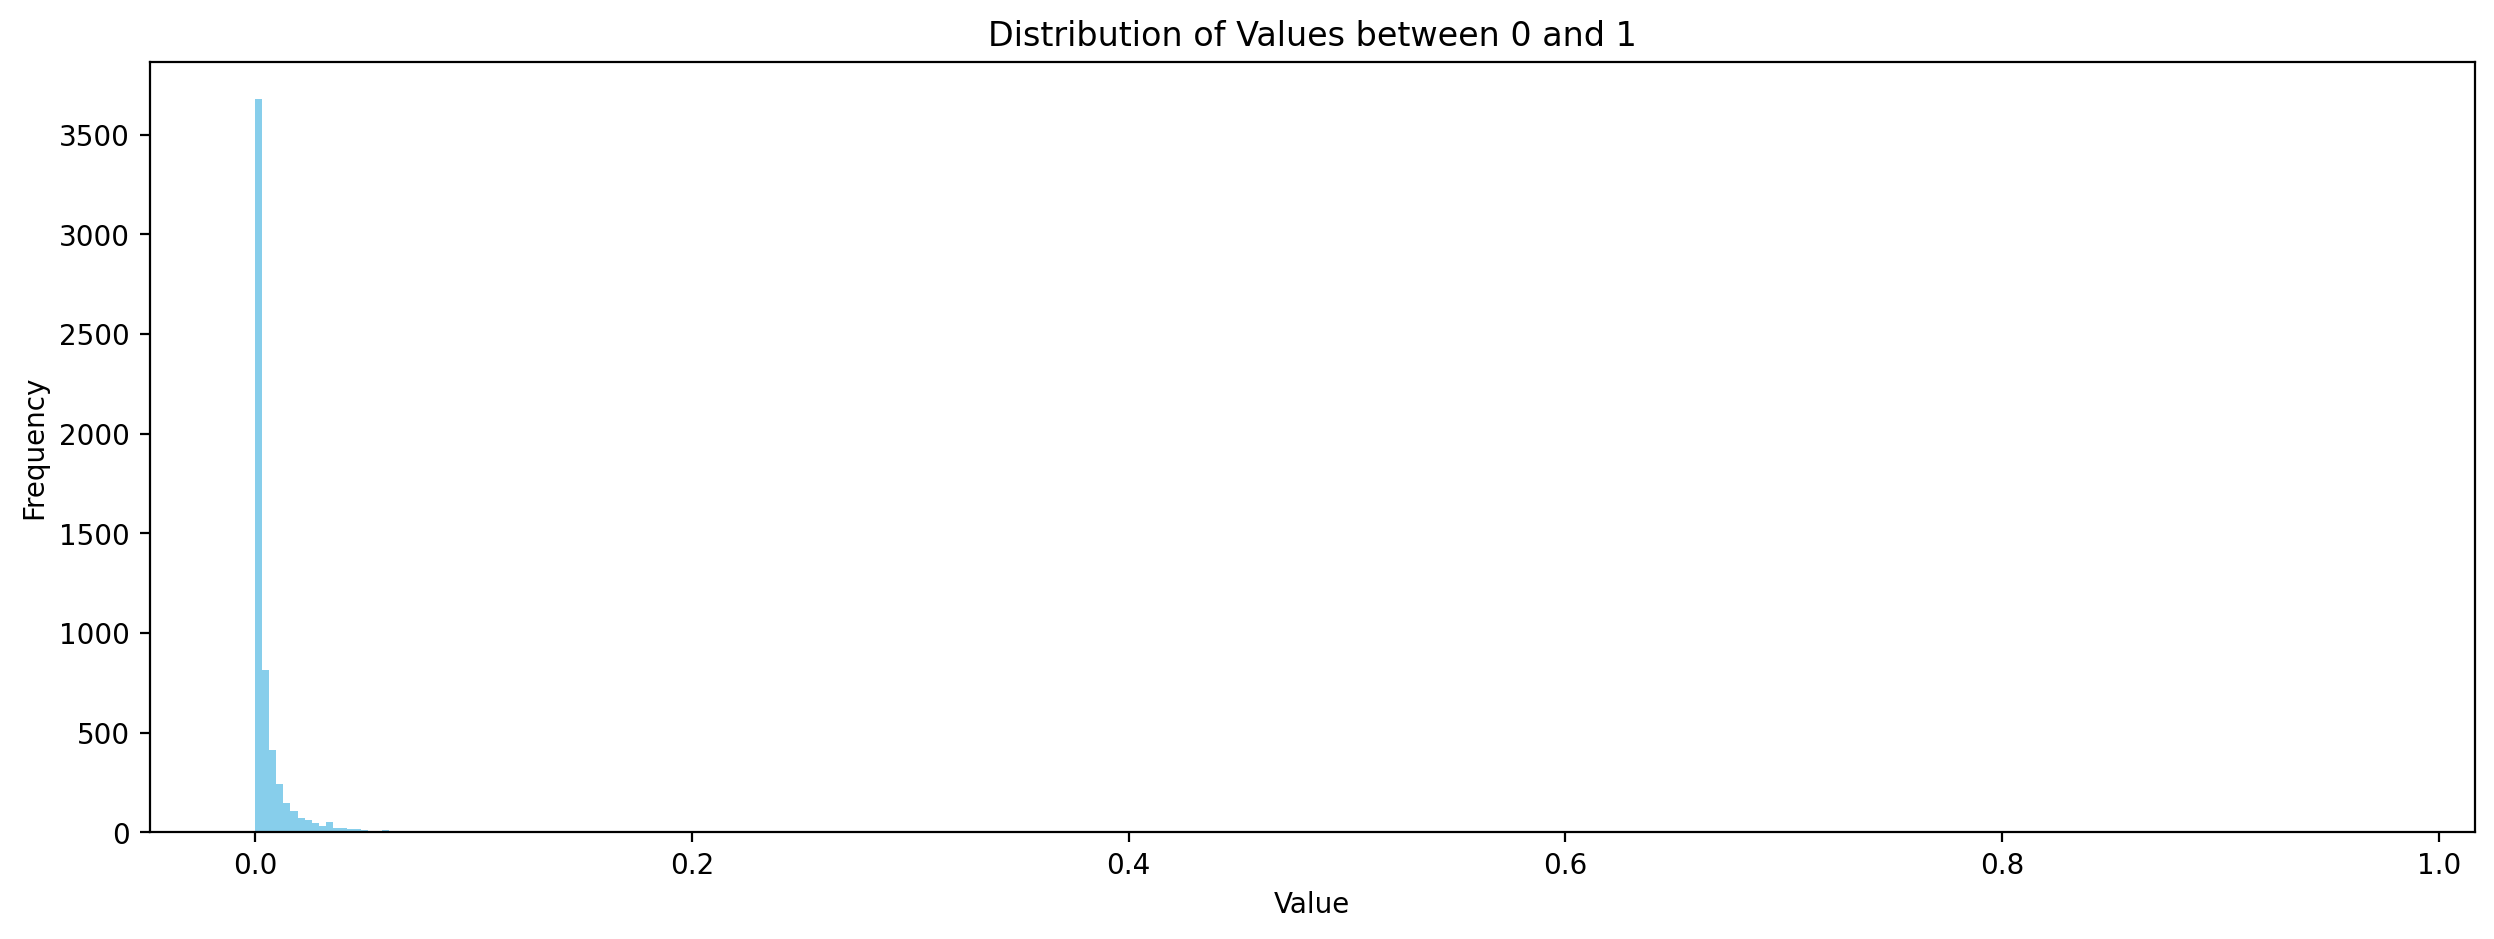

In [20]:
plt.hist(scores['NOBO'], bins=300, color='skyblue')
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.xlim(0.75, 1)
#plt.ylim(0, 200)
#plt.xticks(np.arange(0.8, 1, 0.02))
plt.title('Distribution of Values between 0 and 1')
plt.show()

In [21]:
# Iterate through each row in the scores DataFrame
for index, row in scores.iterrows():
    # Check if the predicted score for the class 'NOBO' is greater than 0.5
    if row["NOBO"] > 0.5:
        # If the score is greater than 0.5, set the 'present' column value to 1
        scores.at[index, 'present'] = 1
    else:
        # If the score is not greater than 0.5, set the 'present' column value to 0
        scores.at[index, 'present'] = 0

# Display the first few rows of the scores DataFrame after updating the 'present' column
print(scores)

                                                                            NOBO  \
file                                               start_time end_time             
c:\Users\jonat\Documents\bobwhite\ravenSelectio... 0.0        1.0       0.296392   
                                                   0.5        1.5       0.066444   
                                                   1.0        2.0       0.113091   
                                                   1.5        2.5       0.036510   
                                                   2.0        3.0       0.033235   
...                                                                          ...   
c:\Users\jonat\Documents\bobwhite\ravenSelectio... 597.0      598.0     0.002525   
                                                   597.5      598.5     0.013060   
                                                   598.0      599.0     0.006376   
                                                   598.5      599.5     0.04

In [22]:
# Initialize variables to count true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN)
TP = 0
TN = 0
FP = 0
FN = 0

# Iterate through each row in the scores DataFrame
for index, row in scores.iterrows():
    # Check if the predicted value (present) is equal to the ground truth value (NOBO) and both are 1 (true positive)
    if row["present"] == test_set.at[index,'NOBO'] == 1:
        TP += 1
    # Check if the predicted value (present) is equal to the ground truth value (NOBO) and both are 0 (true negative)
    elif row["present"] == test_set.at[index,'NOBO'] == 0:
        TN += 1
    # Check if the predicted value is 1 (positive) while the ground truth value is 0 (false positive)
    elif row["present"] == 1 and test_set.at[index,'NOBO'] == 0:
        FP += 1
    # Check if the predicted value is 0 (negative) while the ground truth value is 1 (false negative)
    elif row["present"] == 0 and test_set.at[index,'NOBO'] == 1:
        FN += 1

# Calculate accuracy, precision, recall, and F1 score
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = (2 * (precision * recall)) / (precision + recall)

# Create a confusion matrix
confusion_matrix = [[TP, FP], [FN, TN]]

# Print the metrics and confusion matrix
print("Accuracy =", accuracy)
print("Precision =", precision)
print("Recall =", recall)
print("F1 Score =", f1_score)
print("Confusion Matrix:", confusion_matrix)

Accuracy = 0.9878231859883236
Precision = 0.8032786885245902
Recall = 0.44545454545454544
F1 Score = 0.5730994152046782
Confusion Matrix: [[49, 12], [61, 5873]]


After Training

In [ ]:
from glob import glob

# Search for .wav and .WAV files in all subdirectories of the directory
forest_recordings = glob('./analysis_recording/2022Forest/**/*.[wW][aA][vV]', recursive=True)
grasslandfall_recordings = glob('./analysis_recording/2022GrasslandFall/**/*.[wW][aA][vV]', recursive=True)
grasslandsummer_recordings = glob('./analysis_recording/2022GrasslandSummer/**/*.[wW][aA][vV]', recursive=True)

everything_list = [forest_recordings, grasslandfall_recordings, grasslandsummer_recordings]

#maybe add code here that says if file name is in csv_output, remove from this list
# Path to the csv_output folder
csv_output_folder = './csv_output'

# Iterate over files in the csv_output folder
for file in os.listdir(csv_output_folder):
    # Read the CSV file
    csv_file_path = os.path.join(csv_output_folder, file)
    df = pd.read_csv(csv_file_path)
    # Get the filenames from the "file" column
    filenames = df.iloc[:, 0].tolist()
    # Iterate over each list in everything_list
    for recording_list in everything_list:
        # Check if any filename matches a value in the "file" column
        for filename in filenames:
            if filename in recording_list:
                # Remove the filename from the list
                recording_list.remove(filename)

print(everything_list)

In [ ]:

# import Audio and Spectrogram classes from OpenSoundscape
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram

count = 0
     
for recording_list in everything_list:
    
    if recording_list:
        #doesnt work for multiple files, figure out
        if count == 0:
            for file in recording_list:
                # Extract the base name of the file (excluding path and extension)
                recording_name = os.path.splitext(os.path.basename(file))[0]
                
                # Construct the CSV file name using the recording name
                name = f"csv_output/forest_recordings_{recording_name}.csv"
                
                
                if not os.path.exists(name):
                # Perform prediction and save to CSV
                    print(f"In progress: {recording_name}")
                    predict([file], name)
                    
                # Add the 'Presence' column to the CSV file
                add_presence_column(name)
        elif count == 1:
             for file in recording_list:
                # Extract the base name of the file (excluding path and extension)
                recording_name = os.path.splitext(os.path.basename(file))[0]
                
                # Construct the CSV file name using the recording name
                name = f"csv_output/grasslandfall_recordings_{recording_name}.csv"
            
                
                if not os.path.exists(name):
                # Perform prediction and save to CSV
                    print(f"In progress: {recording_name}")
                    predict([file], name)
                    
                # Add the 'Presence' column to the CSV file
                add_presence_column(name)
        elif count == 2:
            for file in recording_list:
                # Extract the base name of the file (excluding path and extension)
                recording_name = os.path.splitext(os.path.basename(file))[0]
                
                # Construct the CSV file name using the recording name
                name = f"csv_output/grasslandsummer_recordings_{recording_name}.csv"
                
                print(f"In progress: {recording_name}")
                
                if not os.path.exists(name):
                # Perform prediction and save to CSV
                    print(f"In progress: {recording_name}")
                    predict([file], name)
                    
                # Add the 'Presence' column to the CSV file
                add_presence_column(name)

    count += 1
        
        